In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import xml.etree.ElementTree as ET
from fpdf import FPDF

In [84]:
dic = pd.read_csv("data/data_dictionary.csv")
order_det = pd.read_csv("data/order_details.csv")
orders = pd.read_csv("data/orders.csv")
types = pd.read_csv("data/pizza_types.csv")
pizzas = pd.read_csv("data/pizzas.csv")

### Analyze data

In [85]:
order_det.dtypes

order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object

In [86]:
order_det.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [87]:
orders.dtypes

order_id     int64
date        object
time        object
dtype: object

In [88]:
orders.isna().sum()

order_id    0
date        0
time        0
dtype: int64

In [89]:
types.dtypes

pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object

In [90]:
types.isna().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [91]:
pizzas.dtypes

pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object

In [92]:
pizzas.isna().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

### Predict

In [93]:
types.index = types["pizza_type_id"]
types = types.drop(columns=["pizza_type_id"])
types

,name,category,ingredients
pizza_type_id,,,
bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [94]:
order_det

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [95]:
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [96]:
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [97]:
pizza_types = pizzas["pizza_type_id"].unique()

In [98]:
orders = orders.merge(order_det, on="order_id")
orders["date"] = pd.to_datetime(orders["date"]).map(lambda n: n.timetuple().tm_yday)
orders = orders.drop(columns=["order_id", "order_details_id", "time"])
orders


,date,pizza_id,quantity
0,1,hawaiian_m,1
1,1,classic_dlx_m,1
2,1,five_cheese_l,1
3,1,ital_supr_l,1
4,1,mexicana_m,1
...,...,...,...
48615,365,ckn_alfredo_m,1
48616,365,four_cheese_l,1
48617,365,napolitana_s,1
48618,365,mexicana_l,1


In [99]:
n_pizzas = pd.DataFrame(columns=pizza_types, index=range(1, 366))
n_pizzas = n_pizzas.fillna(0)
n_pizzas


,bbq_ckn,cali_ckn,ckn_alfredo,ckn_pesto,southw_ckn,thai_ckn,big_meat,classic_dlx,hawaiian,ital_cpcllo,...,spinach_supr,five_cheese,four_cheese,green_garden,ital_veggie,mediterraneo,mexicana,spin_pesto,spinach_fet,veggie_veg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
pizza_types

array(['bbq_ckn', 'cali_ckn', 'ckn_alfredo', 'ckn_pesto', 'southw_ckn',
       'thai_ckn', 'big_meat', 'classic_dlx', 'hawaiian', 'ital_cpcllo',
       'napolitana', 'pep_msh_pep', 'pepperoni', 'the_greek',
       'brie_carre', 'calabrese', 'ital_supr', 'peppr_salami',
       'prsc_argla', 'sicilian', 'soppressata', 'spicy_ital',
       'spinach_supr', 'five_cheese', 'four_cheese', 'green_garden',
       'ital_veggie', 'mediterraneo', 'mexicana', 'spin_pesto',
       'spinach_fet', 'veggie_veg'], dtype=object)

In [101]:
d = {"_s": 1, "_m": 1.5, "_l": 2, "xl": 3}
for _, row in orders.iterrows():
    pizza_name = "_".join(row["pizza_id"].split("_")[:-1])
    n_pizzas.at[row["date"], pizza_name] = np.trunc(row["quantity"]*d[row["pizza_id"][-2:]]+n_pizzas[pizza_name][row["date"]])
n_pizzas

,bbq_ckn,cali_ckn,ckn_alfredo,ckn_pesto,southw_ckn,thai_ckn,big_meat,classic_dlx,hawaiian,ital_cpcllo,...,spinach_supr,five_cheese,four_cheese,green_garden,ital_veggie,mediterraneo,mexicana,spin_pesto,spinach_fet,veggie_veg
1,17,6,2,7,11,14,5,11,5,13,...,5,14,9,8,2,5,15,3,4,4
2,12,8,1,3,8,13,8,8,15,10,...,11,12,5,1,5,2,8,3,6,9
3,11,18,8,4,9,15,8,6,12,4,...,2,8,12,1,5,4,6,9,3,9
4,17,8,5,2,1,8,0,7,5,5,...,6,8,6,3,4,0,2,4,4,1
5,3,10,12,4,6,9,4,11,7,3,...,3,12,7,2,3,2,5,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,5,5,0,4,3,9,5,8,6,4,...,1,4,7,1,0,0,4,4,1,11
362,2,7,3,3,5,9,3,11,8,5,...,3,4,8,3,2,0,3,2,3,4
363,5,8,1,1,2,8,6,4,6,4,...,0,6,6,1,0,1,0,6,2,2
364,8,10,1,0,10,5,3,5,6,4,...,3,2,9,2,5,2,4,3,1,5


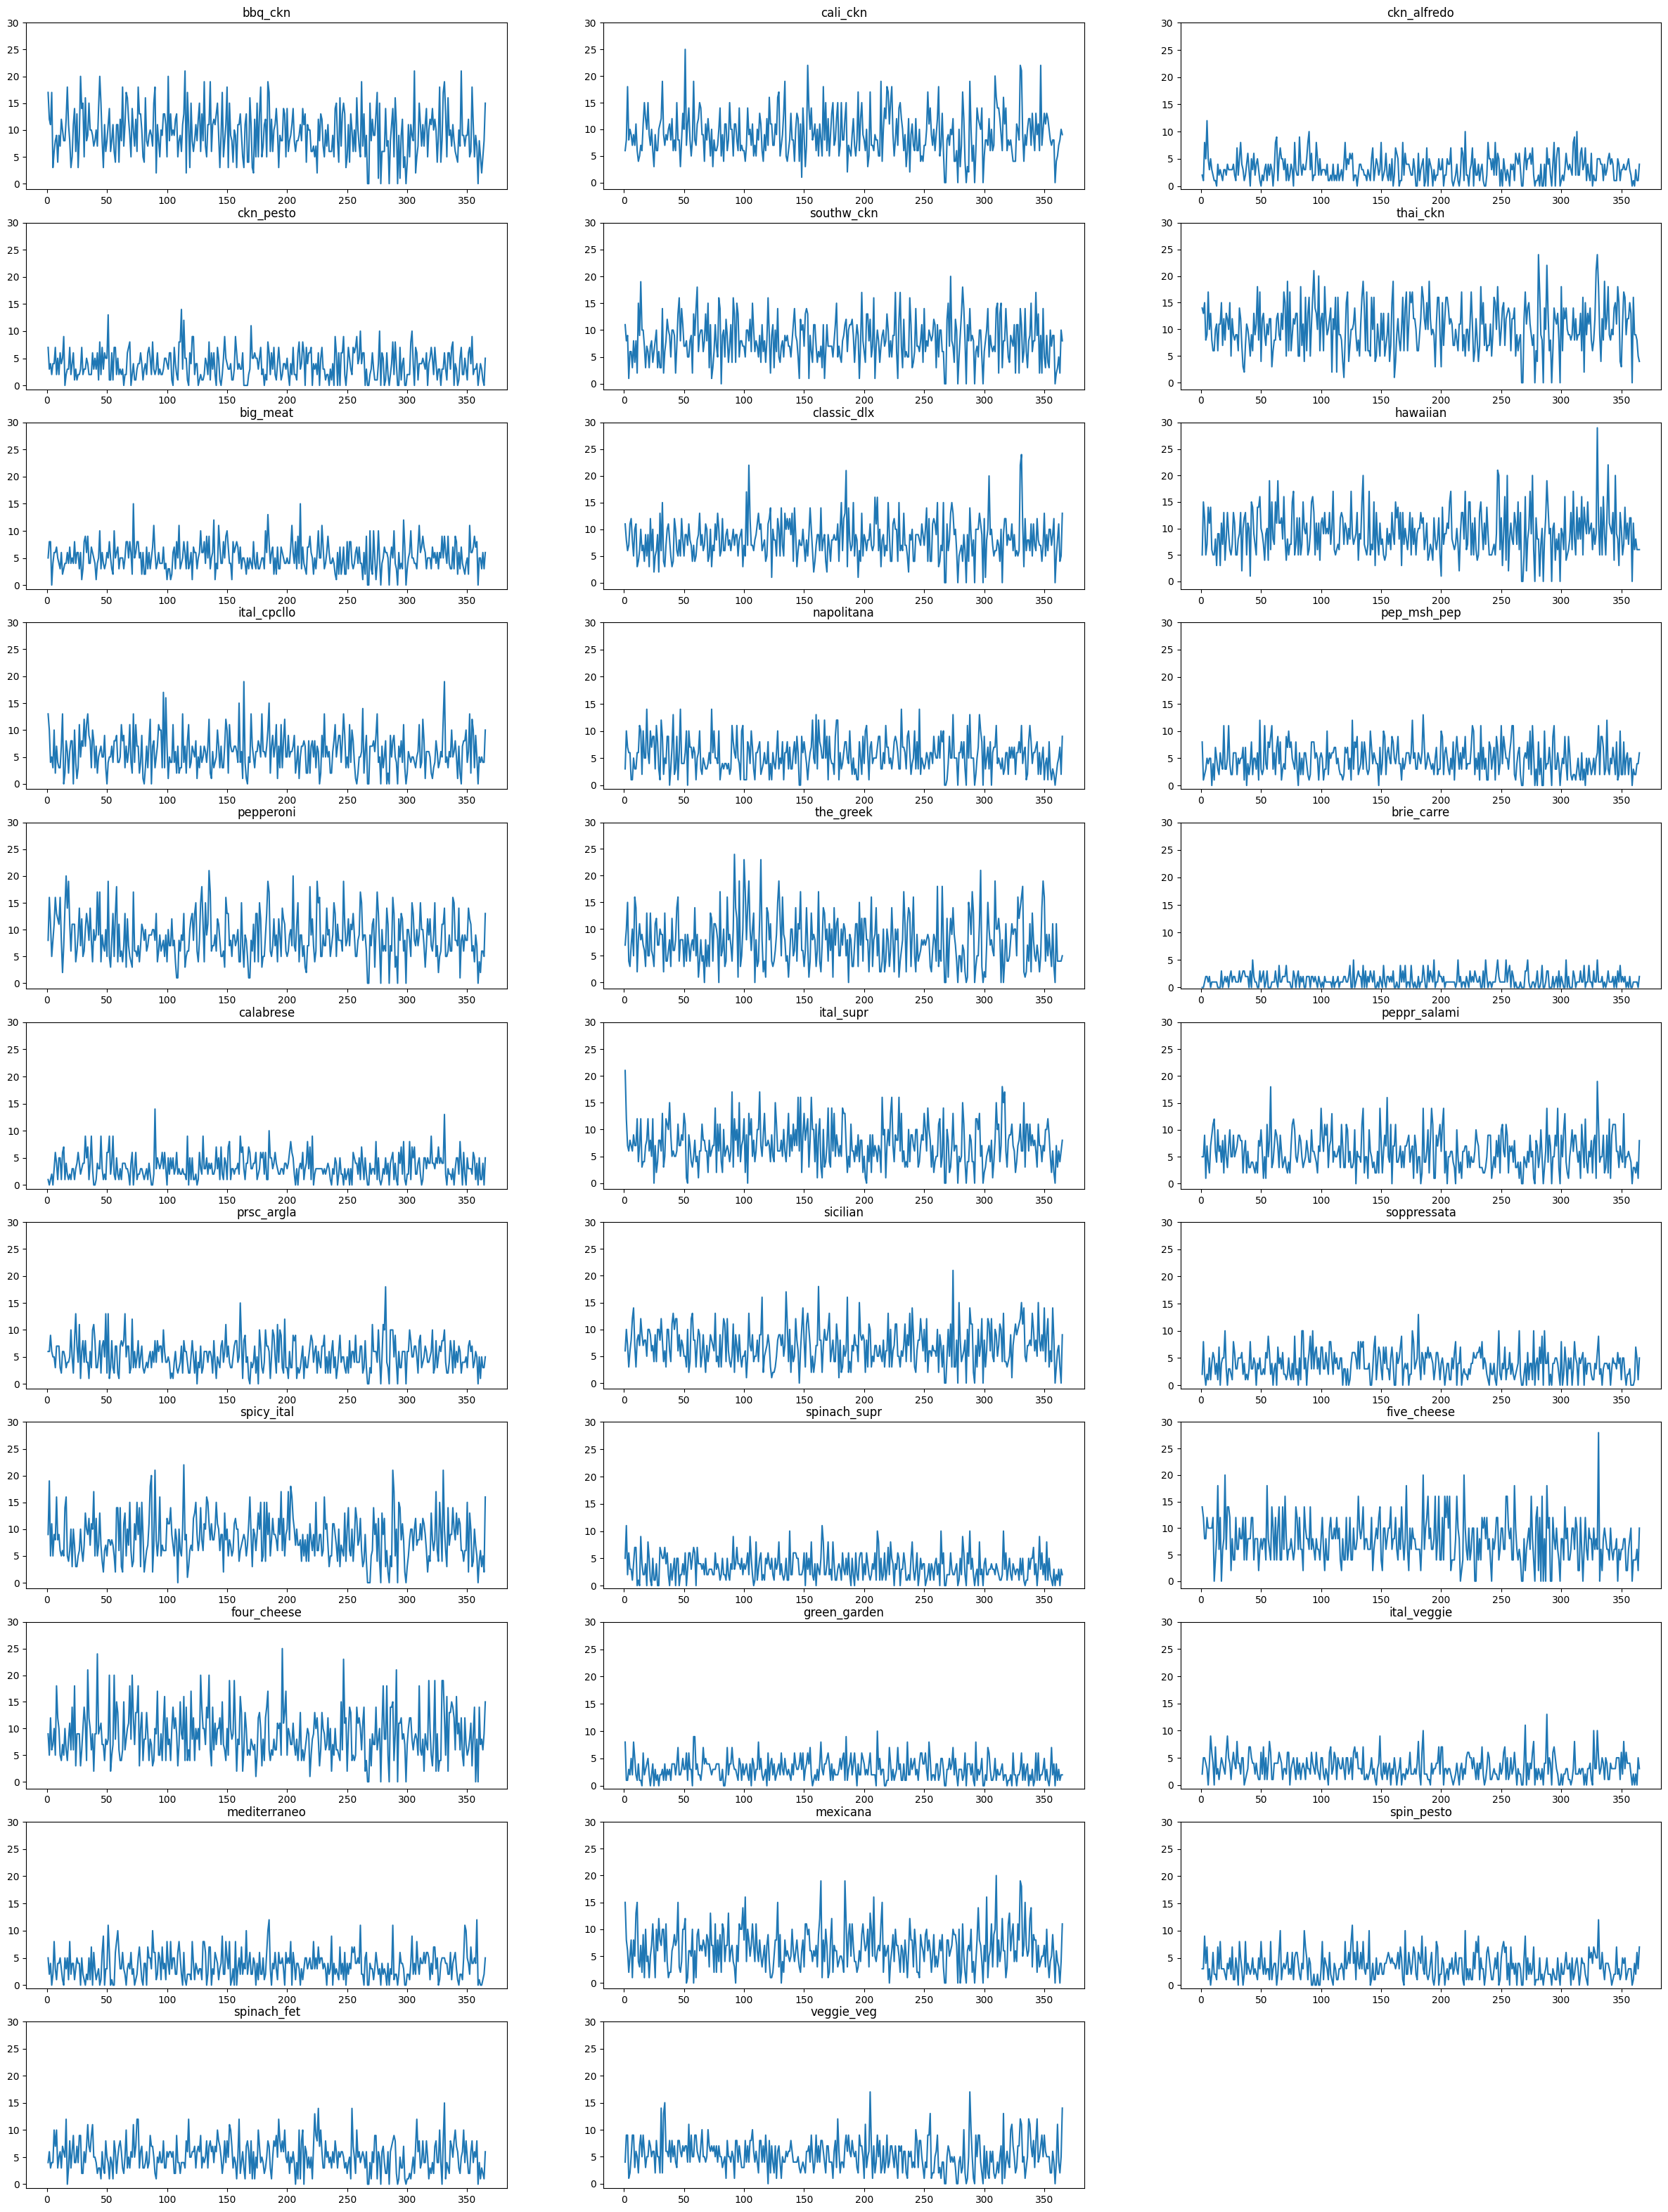

In [165]:
fig = plt.figure(1, figsize=(30, 40))
for i, j in enumerate(pizza_types):
    plt.subplot(len(pizza_types)//3+1, 3, i+1)
    plt.plot(n_pizzas[j])
    plt.title(j)
    plt.ylim(top=30)
plt.show()

In [103]:
def convert_to_ing(day: pd.Series, n_ing: dict, weight):
    for pizza, value in day.items():
        ings = types.loc[pizza]["ingredients"]
        for ing in ings.split(", "):
            n_ing[ing] = n_ing.get(ing, 0)+value*weight
    return n_ing

In [104]:
ingredients = set()
for _, row in types.iterrows():
    for ing in row["ingredients"].split(", "):
        ingredients.add(ing)
ingredients

{'Alfredo Sauce',
 'Anchovies',
 'Artichoke',
 'Artichokes',
 'Arugula',
 'Asiago Cheese',
 'Bacon',
 'Barbecue Sauce',
 'Barbecued Chicken',
 'Beef Chuck Roast',
 'Blue Cheese',
 'Brie Carre Cheese',
 'Calabrese Salami',
 'Capocollo',
 'Caramelized Onions',
 'Chicken',
 'Chipotle Sauce',
 'Chorizo Sausage',
 'Cilantro',
 'Coarse Sicilian Salami',
 'Corn',
 'Eggplant',
 'Feta Cheese',
 'Fontina Cheese',
 'Friggitello Peppers',
 'Garlic',
 'Genoa Salami',
 'Goat Cheese',
 'Gorgonzola Piccante Cheese',
 'Gouda Cheese',
 'Green Olives',
 'Green Peppers',
 'Italian Sausage',
 'Jalapeno Peppers',
 'Kalamata Olives',
 'Luganega Sausage',
 'Mozzarella Cheese',
 'Mushrooms',
 'Onions',
 'Oregano',
 'Pancetta',
 'Parmigiano Reggiano Cheese',
 'Pears',
 'Peperoncini verdi',
 'Pepperoni',
 'Pesto Sauce',
 'Pineapple',
 'Plum Tomatoes',
 'Prosciutto',
 'Prosciutto di San Daniele',
 'Provolone Cheese',
 'Red Onions',
 'Red Peppers',
 'Ricotta Cheese',
 'Romano Cheese',
 'Sliced Ham',
 'Smoked Gouda

In [105]:
ing_quantity = pd.DataFrame(columns=list(ingredients), index=range(1, 366))
ing_quantity = ing_quantity.fillna(0)
ing_quantity

,Asiago Cheese,�Nduja Salami,Luganega Sausage,Kalamata Olives,Onions,Feta Cheese,Artichokes,Pepperoni,Genoa Salami,Jalapeno Peppers,...,Provolone Cheese,Artichoke,Tomatoes,Alfredo Sauce,Sliced Ham,Arugula,Brie Carre Cheese,Green Olives,Chicken,Pancetta
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
for i, row in n_pizzas.iterrows():
    for ing, val in convert_to_ing(row, {}, weight=1).items():
        ing_quantity.at[i, ing] = val
ing_quantity

,Asiago Cheese,�Nduja Salami,Luganega Sausage,Kalamata Olives,Onions,Feta Cheese,Artichokes,Pepperoni,Genoa Salami,Jalapeno Peppers,...,Provolone Cheese,Artichoke,Tomatoes,Alfredo Sauce,Sliced Ham,Arugula,Brie Carre Cheese,Green Olives,Chicken,Pancetta
1,12,1,6,17,6,24,24,42,5,32,...,14,6,151,2,5,6,0,38,40,1
2,17,0,10,23,10,19,40,49,5,24,...,12,8,149,1,15,6,0,33,33,0
3,19,1,7,21,7,23,25,38,9,33,...,8,18,126,8,12,9,1,22,54,1
4,12,2,3,10,3,11,25,22,1,11,...,8,8,86,5,5,6,2,18,24,2
5,22,0,6,8,6,11,20,38,7,21,...,12,10,82,12,7,5,2,22,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4,1,6,5,6,6,11,21,3,12,...,4,5,73,0,6,1,1,14,21,1
362,8,1,7,7,7,10,10,27,2,15,...,4,7,69,3,8,5,1,21,27,1
363,5,4,3,5,3,8,12,24,4,10,...,6,8,60,1,6,3,1,15,20,4
364,5,0,0,9,0,9,15,21,1,24,...,2,10,64,1,6,3,0,10,26,0


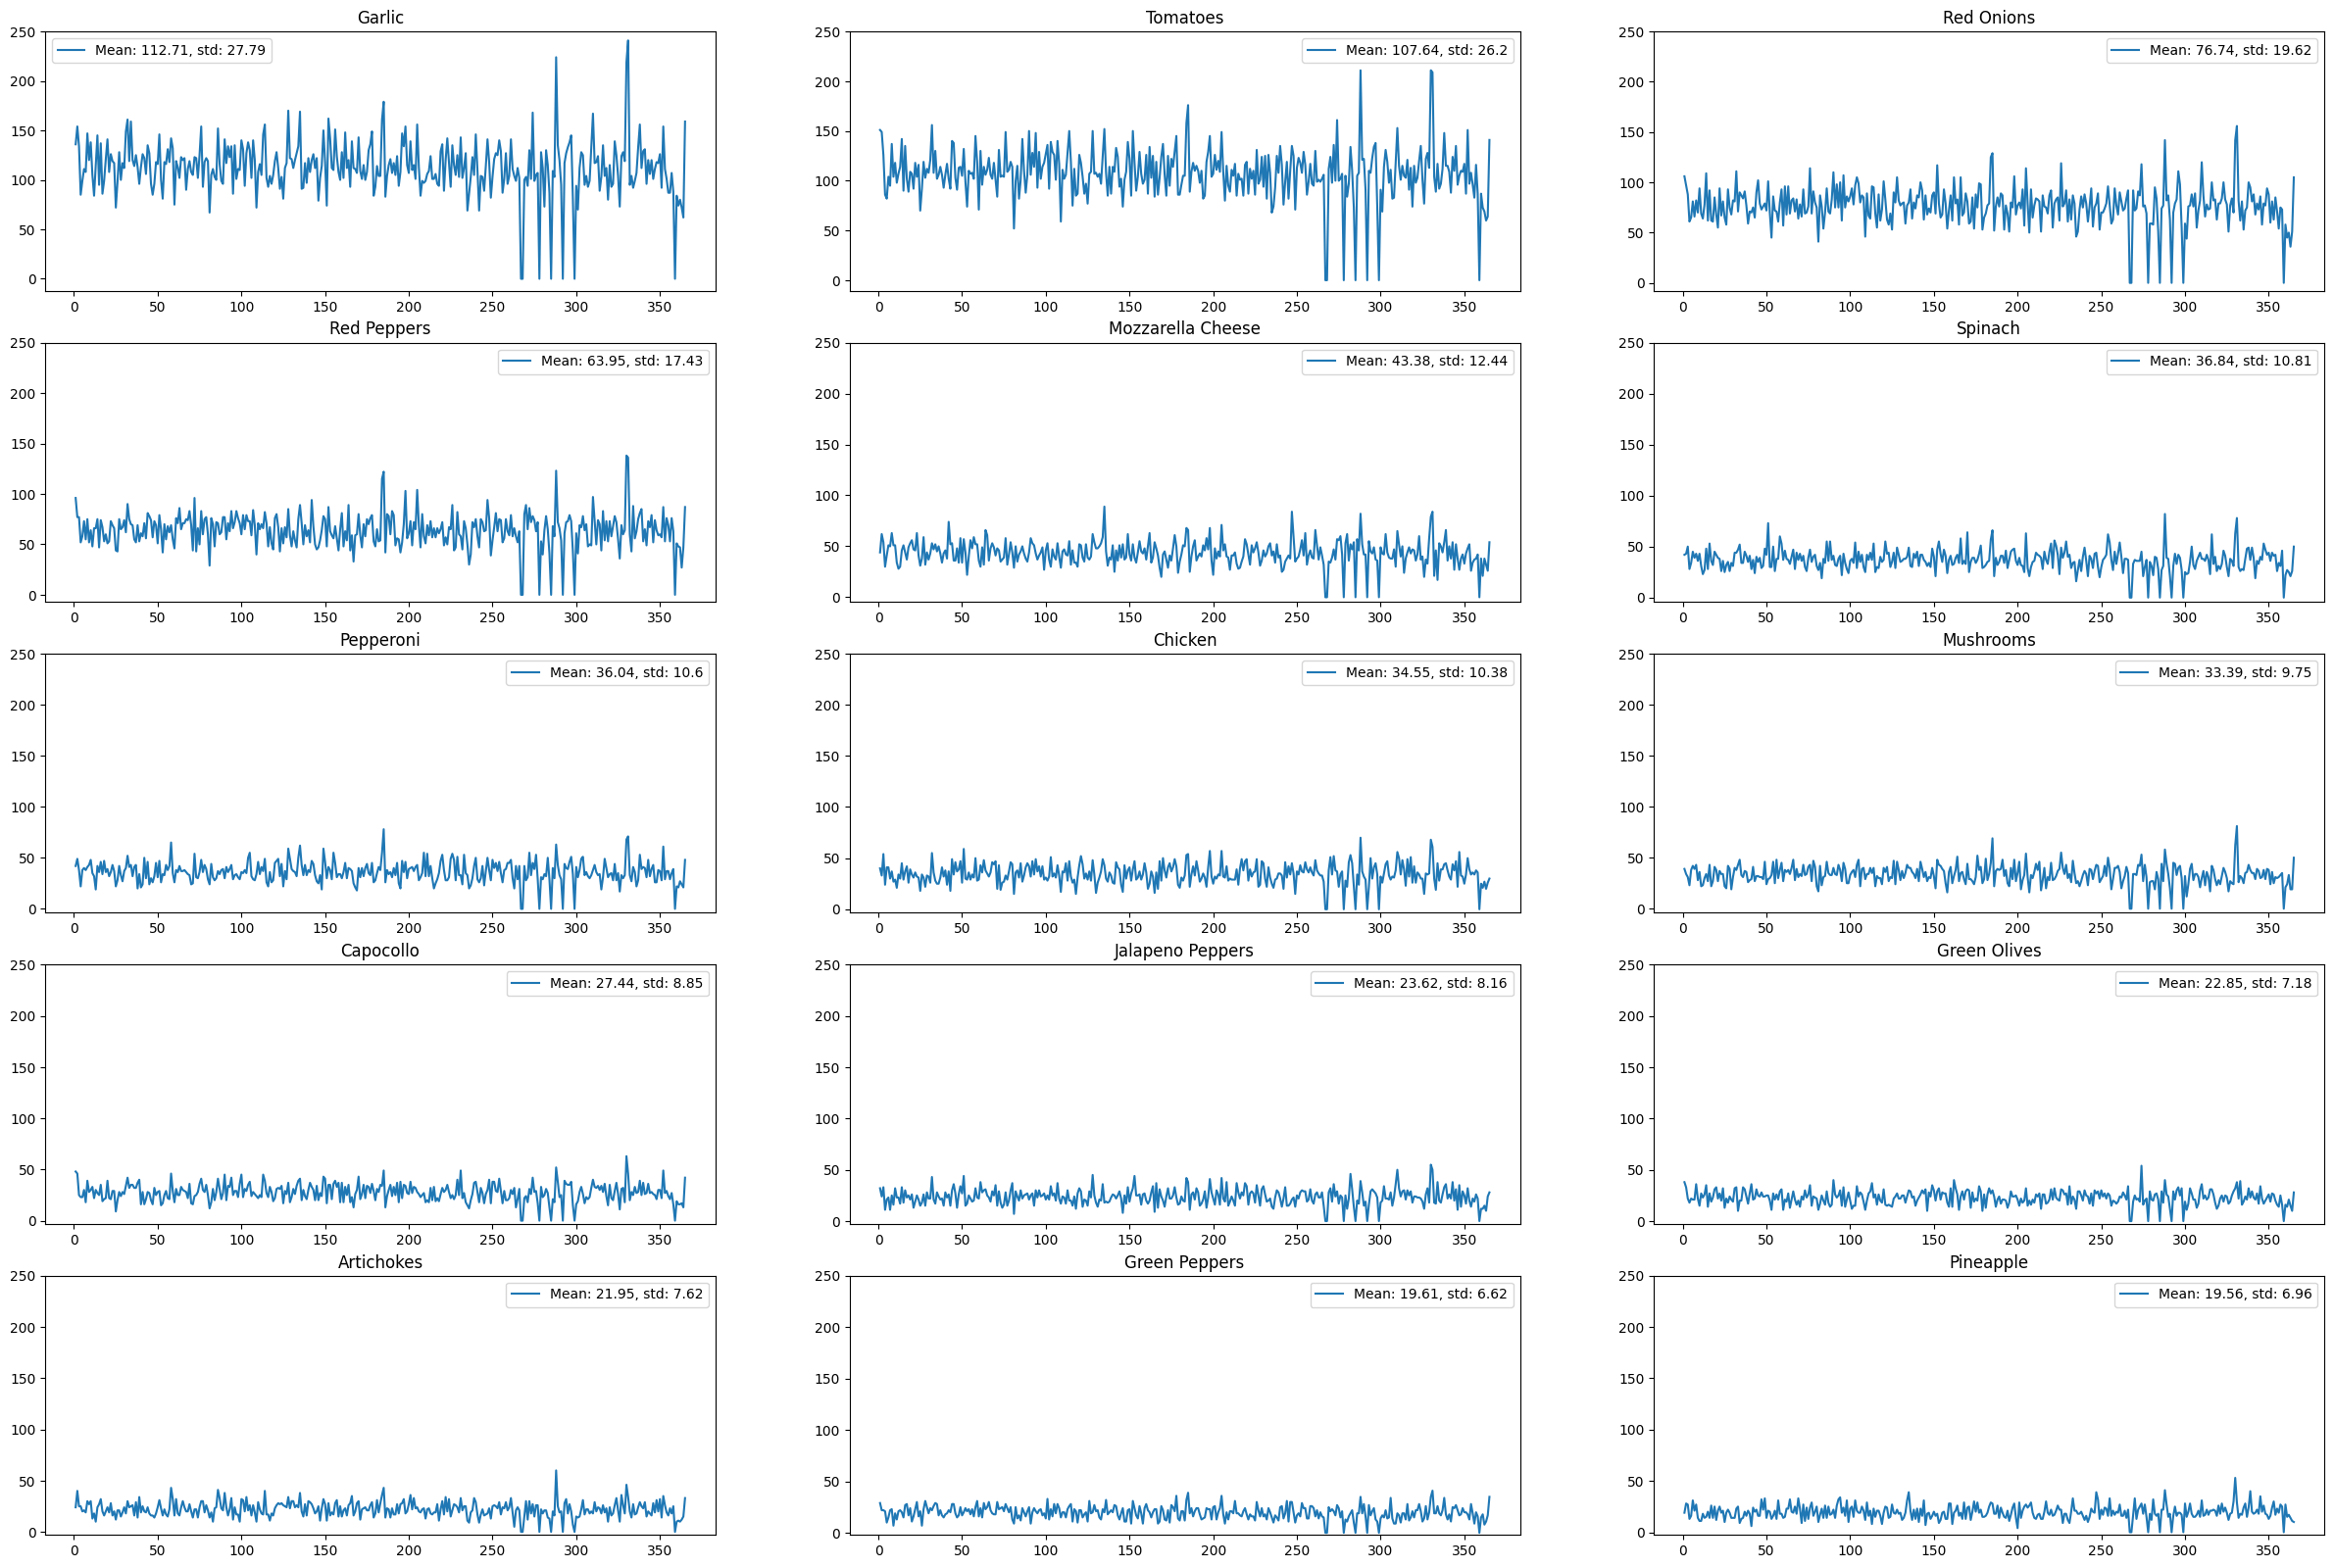

In [181]:
fig = plt.figure(1, figsize=(30, 90))
for i, j in enumerate(sorted(ingredients, key=lambda ing: ing_quantity[ing].sum(), reverse=True)[:15]):
    plt.subplot(len(ingredients)//3+1, 3, i+1)
    plt.plot(ing_quantity[j], label=f"Mean: {round(ing_quantity[j].mean(), 2)}, std: {round(ing_quantity[j].std(), 2)}")
    plt.title(j)
    plt.ylim(top=250)
    plt.legend()
plt.show()

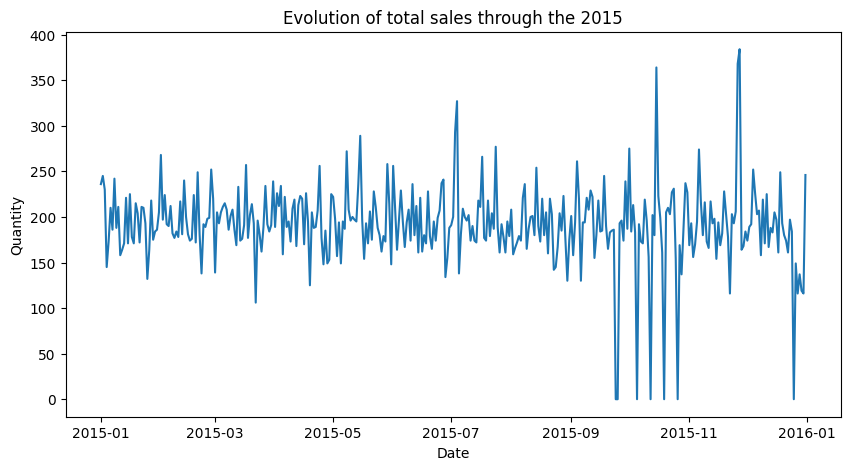

In [134]:
plt.figure(1, figsize=(10, 5))
plt.plot(list(map(lambda day: pd.to_datetime(f"{day}-2015", format="%j-%Y"), n_pizzas.index)), n_pizzas.sum(axis=1))
plt.title("Evolution of total sales through the 2015")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()

In [23]:
def represent(day, df: pd.DataFrame):
    expected = {}
    for i in range(1, 8):
        expected = convert_to_ing(df.loc[day-i], expected, weight=3)

    for i in range(1, 3):
        expected = convert_to_ing(df.loc[day-7*i], expected, weight=7)

    expected = {key: int((value//42)*1.5) for key, value in expected.items()}
    print("----Real-----")
    print("real:", convert_to_ing(df.loc[day], {}, 1))
    print("----Predicted-----")
    print("predicted:", expected)


def get_prediction(day, df: pd.DataFrame):
    if not os.path.exists("predictions"):
        os.mkdir("predictions")
    expected = {}
    for day_inc in range(7):
        expected_day = {}
        for i in range(1, 8):
            expected_day = convert_to_ing(df.loc[day+day_inc-i], expected_day, weight=3)

        for i in range(1, 4):
            expected_day = convert_to_ing(df.loc[day+day_inc-7*i], expected_day, weight=7)

        expected[day+day_inc] = {key: int((value//42)*1.5) for key, value in expected_day.items()}

        if day+day_inc > 365:
            break
    
    return pd.DataFrame(expected).T

In [24]:
day = 220
represent(day, df)
prediction = get_prediction(day, df)
prediction.to_csv(f"output/prediction{day}.csv")

----Real-----
real: {'Barbecued Chicken': 6, 'Red Peppers': 72, 'Green Peppers': 18, 'Tomatoes': 119, 'Red Onions': 92, 'Barbecue Sauce': 6, 'Chicken': 49, 'Artichoke': 17, 'Spinach': 53, 'Garlic': 136, 'Jalapeno Peppers': 34, 'Fontina Cheese': 19, 'Gouda Cheese': 17, 'Mushrooms': 45, 'Asiago Cheese': 24, 'Alfredo Sauce': 10, 'Pesto Sauce': 19, 'Corn': 17, 'Cilantro': 17, 'Chipotle Sauce': 17, 'Pineapple': 22, 'Thai Sweet Chilli Sauce': 5, 'Bacon': 21, 'Pepperoni': 53, 'Italian Sausage': 6, 'Chorizo Sausage': 6, 'Sliced Ham': 17, 'Mozzarella Cheese': 52, 'Capocollo': 32, 'Goat Cheese': 15, 'Oregano': 7, 'Anchovies': 7, 'Green Olives': 31, 'Kalamata Olives': 18, 'Feta Cheese': 17, 'Beef Chuck Roast': 8, 'Brie Carre Cheese': 0, 'Prosciutto': 0, 'Caramelized Onions': 0, 'Pears': 0, 'Thyme': 0, '�Nduja Salami': 1, 'Pancetta': 1, 'Friggitello Peppers': 1, 'Calabrese Salami': 10, 'Genoa Salami': 7, 'Prosciutto di San Daniele': 9, 'Arugula': 9, 'Coarse Sicilian Salami': 13, 'Luganega Sausage'

### Save Report

In [25]:
def get_word_xml(docx_filename):
    with open(docx_filename, "rb") as f:
        zip = zipfile.ZipFile(f)
        xml_content = zip.read('word/document.xml')
        return xml_content

In [26]:
def convert_row(row: pd.Series, parent):
    s = ET.SubElement(parent, str(row.name))
    for column in row.index:
        element = ET.SubElement(s, column)
        element.text = str(row[column])
    return s

In [27]:
root = ET.fromstring(get_word_xml("data/Informe.docx"))
recommendation = ET.SubElement(root, "recommendation")

for _, row in prediction.iterrows():
    convert_row(row, recommendation)

b_xml = ET.tostring(root)
 
# Opening a file under the name `items2.xml`,
# with operation mode `wb` (write + binary)
with open("output/Informe.xml", "wb") as f:
    f.write(b_xml)

### Create pdf

In [183]:
pdf = FPDF("P", "mm")

pdf.set_font("Times", "B", size=16)

pdf.add_page()

pdf.multi_cell(0, 10, "Sales report\n", align="C")

pdf.set_font("Times", "", size=12)

pdf.multi_cell(0, 10, "Total sales: we can appreciate that it more or less stays even except for 4 main days in the later part of the year.\n")

pdf.image("output/ev_tot_sales.png", w=120, h=66, x=(pdf.w-120)/2)

pdf.multi_cell(0, 10, "\n\nPizza sales: there is not a specific pizza type that shines over the others, although some, such as brie carre and green garden, do sell considerably less.\n")

pdf.image("output/sales_by_pizza.png", w=150, h=180, x=(pdf.w-150)/2)

pdf.multi_cell(0, 10, "\n\nIngredient sales: Only the 15 highest are graphed. It can be seen that there is a big difference between the 4 ingredients with most sales and the rest")

pdf.image("output/sales_by_ing.png", w=150, h=120, x=(pdf.w-180)/2)

pdf.output("output/Informe_ejecutivo.pdf")